# Hierarchical clustering with 2D toy datasets

# [作業目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [46]:
# 載入套件
import time
import warnings

import numpy as np #產生陣列數值
import matplotlib.pyplot as plt #用來繪製影像

from sklearn import cluster, datasets #用來匯入資料庫 
from sklearn.preprocessing import StandardScaler #去均值和方差歸一化，且是針對每一個特徵維度來做的，而不是針對樣本。
from itertools import cycle, islice #islice創建一個迭代器

In [47]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 雙半月 資料點
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# 生成 緊密三群 資料點
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# 生成 2維均勻分布 資料點
no_structure = np.random.rand(n_samples, 2), None

"""
參數說明

n_samples：樣本點數目。
noise：控制屬於同一個圈的樣本點附加的漂移程度。
factor：控制內外圈的接近程度，越大越接近，上限為1。
random_state：int，RandomState實例或無，可選（默認值=無）。
              如果為int，random_state是隨機數生成器使用的種子；否則為false。
              如果是RandomState實例，則random_state是隨機數生成器；
              如果為None，則隨機數生成器是np.random使用的RandomState實例。

參考來源:http://www.ishenping.com/ArtInfo/937698.html
"""

'\n參數說明\n\nn_samples：樣本點數目。\nnoise：控制屬於同一個圈的樣本點附加的漂移程度。\nfactor：控制內外圈的接近程度，越大越接近，上限為1。\nrandom_state：int，RandomState實例或無，可選（默認值=無）。\n              如果為int，random_state是隨機數生成器使用的種子；否則為false。\n              如果是RandomState實例，則random_state是隨機數生成器；\n              如果為None，則隨機數生成器是np.random使用的RandomState實例。\n\n參考來源:http://www.ishenping.com/ArtInfo/937698.html\n'

In [48]:
# 設定群集與繪圖參數
plt.figure(figsize=(18, 12))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
"""
參數說明

n_neighbors: 即要選擇最近幾個點，預設值是 5（等效 k )。
n_clusters:生成的聚類樹，即產生的質心（centroids）數。
"""

datasets = [(noisy_moons, {'n_clusters': 2}), (blobs, {}), (no_structure, {})]
"""
參數說明

n_neighbors: 即要選擇最近幾個點，預設值是 5（等效 k )。
"""

'\n參數說明\n\nn_neighbors: 即要選擇最近幾個點，預設值是 5（等效 k )。\n'

<Figure size 1296x864 with 0 Axes>

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

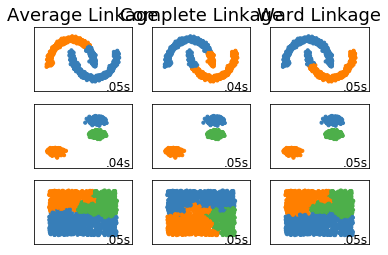

In [49]:
# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # 複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    """
    linkage：鏈接標準，即樣本點的合併標準，
    主要有ward、complete、average三個參數可選，默認是ward。
    每個簇（類）本身就是一個集合，我們在合併兩個簇的時候其實是在合併兩個集合，
    所以我們需要找到一種計算兩個集合之間距離的方式，
    主要有這三種方式：ward、complete、average，
    分別表示使用兩個集合方差、兩個集合中點與點距離之間的平均值、兩個集合中距離最小的兩個點的距離。

    參考來源:https://www.itcodemonkey.com/article/5570.html
    """
    
    
   # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        '''
        X[:, 0], X[:, 1]:兩個點的座標
        s :fontsize
        color : 顏色
        '''
        
        # 設置座標軸邊界 xlim ylim
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        # 設置刻度值即座標軸刻度 xticks yticks
        plt.xticks(())
        plt.yticks(())
        # plt.text: Add text to the axes.
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=12,
                 horizontalalignment='right')
        plot_num += 1
plt.show()
